<a href="https://colab.research.google.com/github/harsha3038/23CSBTB45-46/blob/main/AIML_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

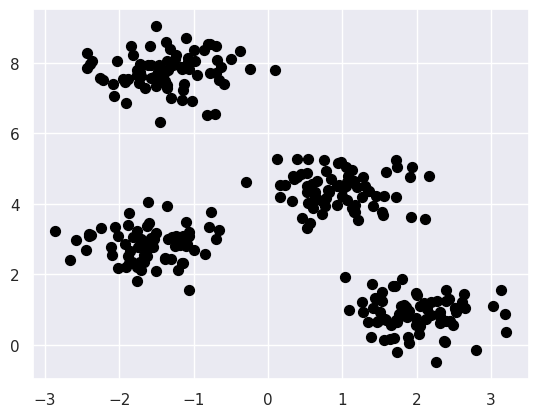

In [5]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50, color='black');

In [6]:
from sklearn.cluster  import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

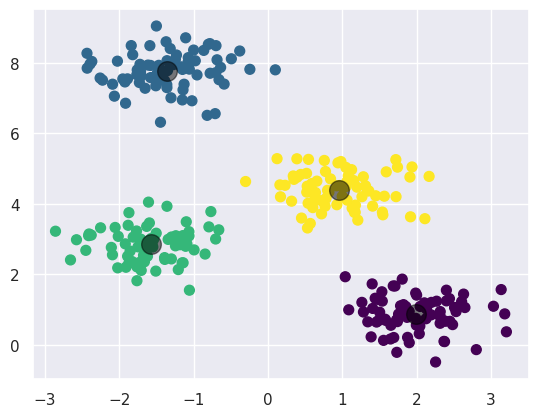

In [7]:
plt.scatter(X[:,0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);


In [8]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
    centers, labels = find_clusters(X, 3)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

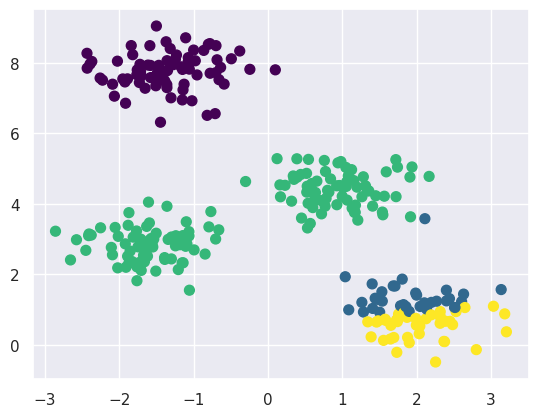

In [9]:
centers, labels = find_clusters(X, 4, rseed=0) # Change 'rseeds' to 'rseed'
plt.scatter(X[:, 0],  X[:, 1], c=labels, s=50, cmap='viridis');

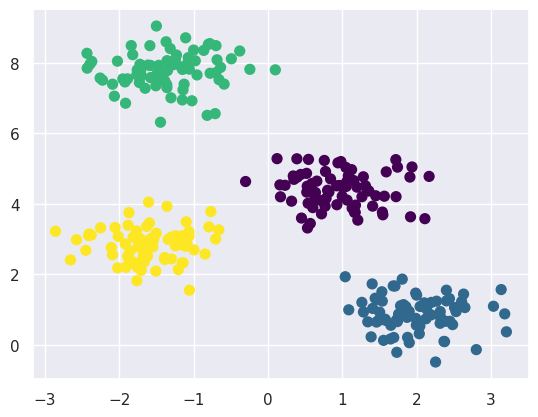

In [10]:
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)


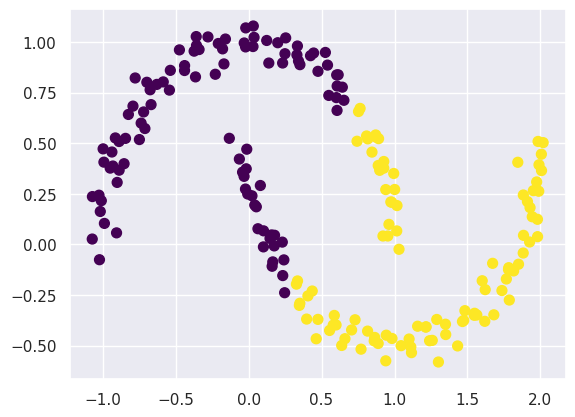

In [12]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


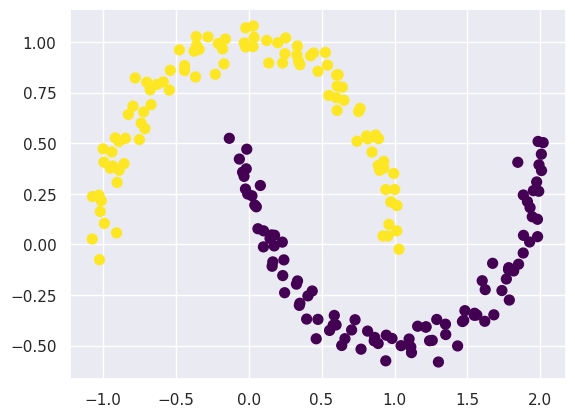

In [13]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [14]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
X = X[:, ::-1]

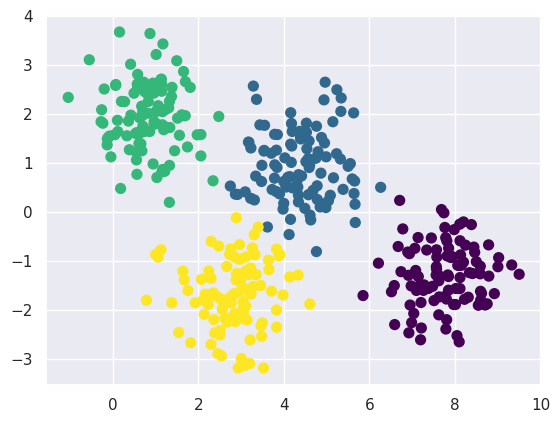

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0, n_init=10)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',edgecolor='k', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

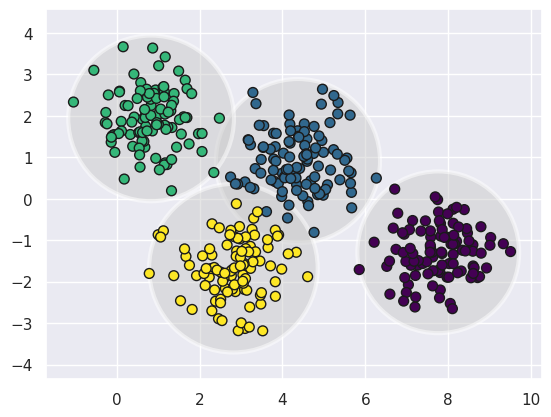

In [18]:
kmeans =KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X)

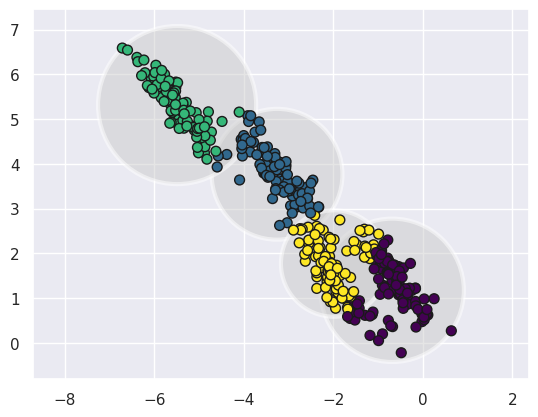

In [19]:
rng= np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X_stretched)

NameError: name 'b' is not defined

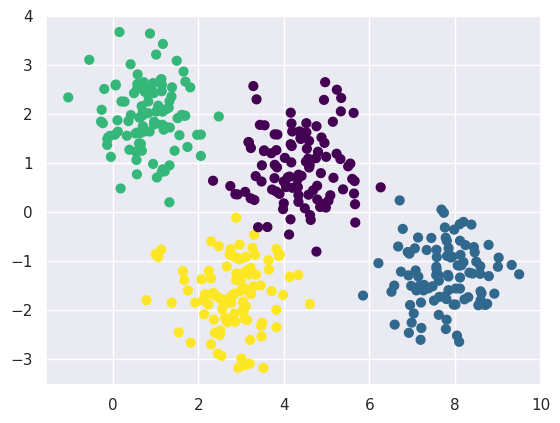

In [20]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [21]:
probs= gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.978 0.022 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.999 0.    0.    0.001]
 [0.    0.    0.    1.   ]]
